In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go


In [125]:
data = pd.read_csv('data_phone.csv')
# Xem dữ liệu:
data

,brand,model,OS,internal_memory,RAM,battery_mah,Screen,year,Price
0,Acer,beTouch E110,Android,0.25,0.25,1500.0,2.80,2010,70.0
1,BlackBerry,Bold 9700,BlackBerry,0.25,0.25,1500.0,2.44,2009,90.0
2,BlackBerry,Curve 3G 9300,BlackBerry,0.25,0.25,1150.0,2.46,2010,80.0
3,Dell,XCD28,Android,0.25,0.25,1100.0,2.80,2010,180.0
4,ZTE,Racer,Android,0.25,0.25,1100.0,2.80,2010,180.0
...,...,...,...,...,...,...,...,...,...
3916,Celkon,A79,Android,NaN,NaN,1300.0,3.50,2013,70.0
3917,Celkon,A99+,Android,NaN,NaN,1300.0,4.30,2012,NaN
3918,Celkon,A77,Android,NaN,NaN,1300.0,3.50,2012,50.0
3919,Celkon,A99,Android,NaN,NaN,1200.0,4.00,2012,NaN


Dữ liệu này bao gồm các thuộc tính:
- brand : Hãng điện thoại
- model	: Tên điện thoại
- OS : hệ điều hành
- internal_memory : dung lượng rom
- RAM : dung lượng ram
- battery :	dung lượng pin
- Screen : kích thước điện thoại, tính bằng inches
- year	: năm ra mắt
- Price : giá của điện thoại

In [126]:
# kiểm tra có trùng lặp dữ liệu không?
data.duplicated().sum()

0

In [127]:
data.isnull().sum()

brand                 0
model                 0
OS                    0
internal_memory     160
RAM                 238
battery_mah         161
Screen               15
year                  0
Price              1073
dtype: int64

In [128]:
# xóa dữ liệu rỗng
data = data.dropna(axis=0)

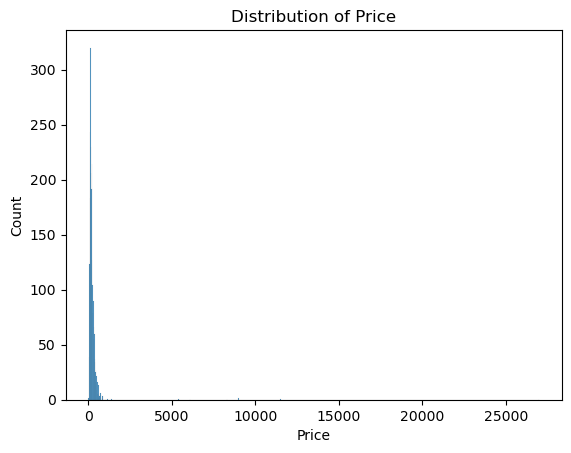

In [129]:
# Kiểm tra sự phân bố của biến Price
sns.histplot(data['Price'])
plt.title('Distribution of Price')
plt.show()

In [130]:
# Xử lý giá trị nhiễu bất thường bằng phương pháp IQR
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.9)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = (data['Price'] < lower_bound) | (data['Price'] > upper_bound)
phone_data = data[~outlier_indices]


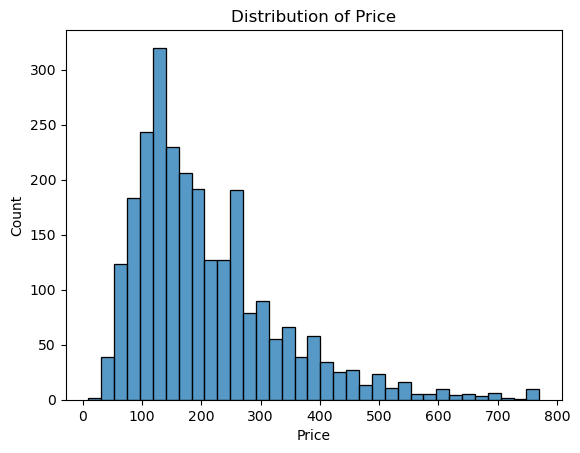

In [131]:
# Kiểm tra sự phân bố của biến Price
sns.histplot(phone_data['Price'])
plt.title('Distribution of Price')
plt.show()

In [132]:
phone_data

,brand,model,OS,internal_memory,RAM,battery_mah,Screen,year,Price
0,Acer,beTouch E110,Android,0.25,0.25,1500.0,2.80,2010,70.0
1,BlackBerry,Bold 9700,BlackBerry,0.25,0.25,1500.0,2.44,2009,90.0
2,BlackBerry,Curve 3G 9300,BlackBerry,0.25,0.25,1150.0,2.46,2010,80.0
3,Dell,XCD28,Android,0.25,0.25,1100.0,2.80,2010,180.0
4,ZTE,Racer,Android,0.25,0.25,1100.0,2.80,2010,180.0
...,...,...,...,...,...,...,...,...,...
3749,ZTE,nubia Z17,Android,128.00,6.00,3200.0,5.50,2017,500.0
3750,vivo,Xplay6,Android,128.00,6.00,4080.0,5.46,2016,700.0
3751,vivo,Xplay5 Elite,Android,128.00,6.00,3600.0,5.43,2016,610.0
3752,ZTE,Axon 7s,Android,128.00,6.00,3400.0,5.50,2017,700.0


In [133]:
x = phone_data.drop('Price', axis = 1)
y = phone_data.Price

In [134]:
brands = phone_data['brand'].unique()
models = phone_data['model'].unique()
os = phone_data['OS'].unique()

In [135]:
cat_features = np.array([i for i in phone_data.columns.tolist() if phone_data[i].dtype == 'object'])
cont_features = np.array([i for i in phone_data.columns.tolist() if phone_data[i].dtype != 'object'])

In [136]:
from sklearn.preprocessing import LabelEncoder
for i in cat_features:
    enc = LabelEncoder()
    x[i] =enc.fit_transform(x[i])


<Axes: >

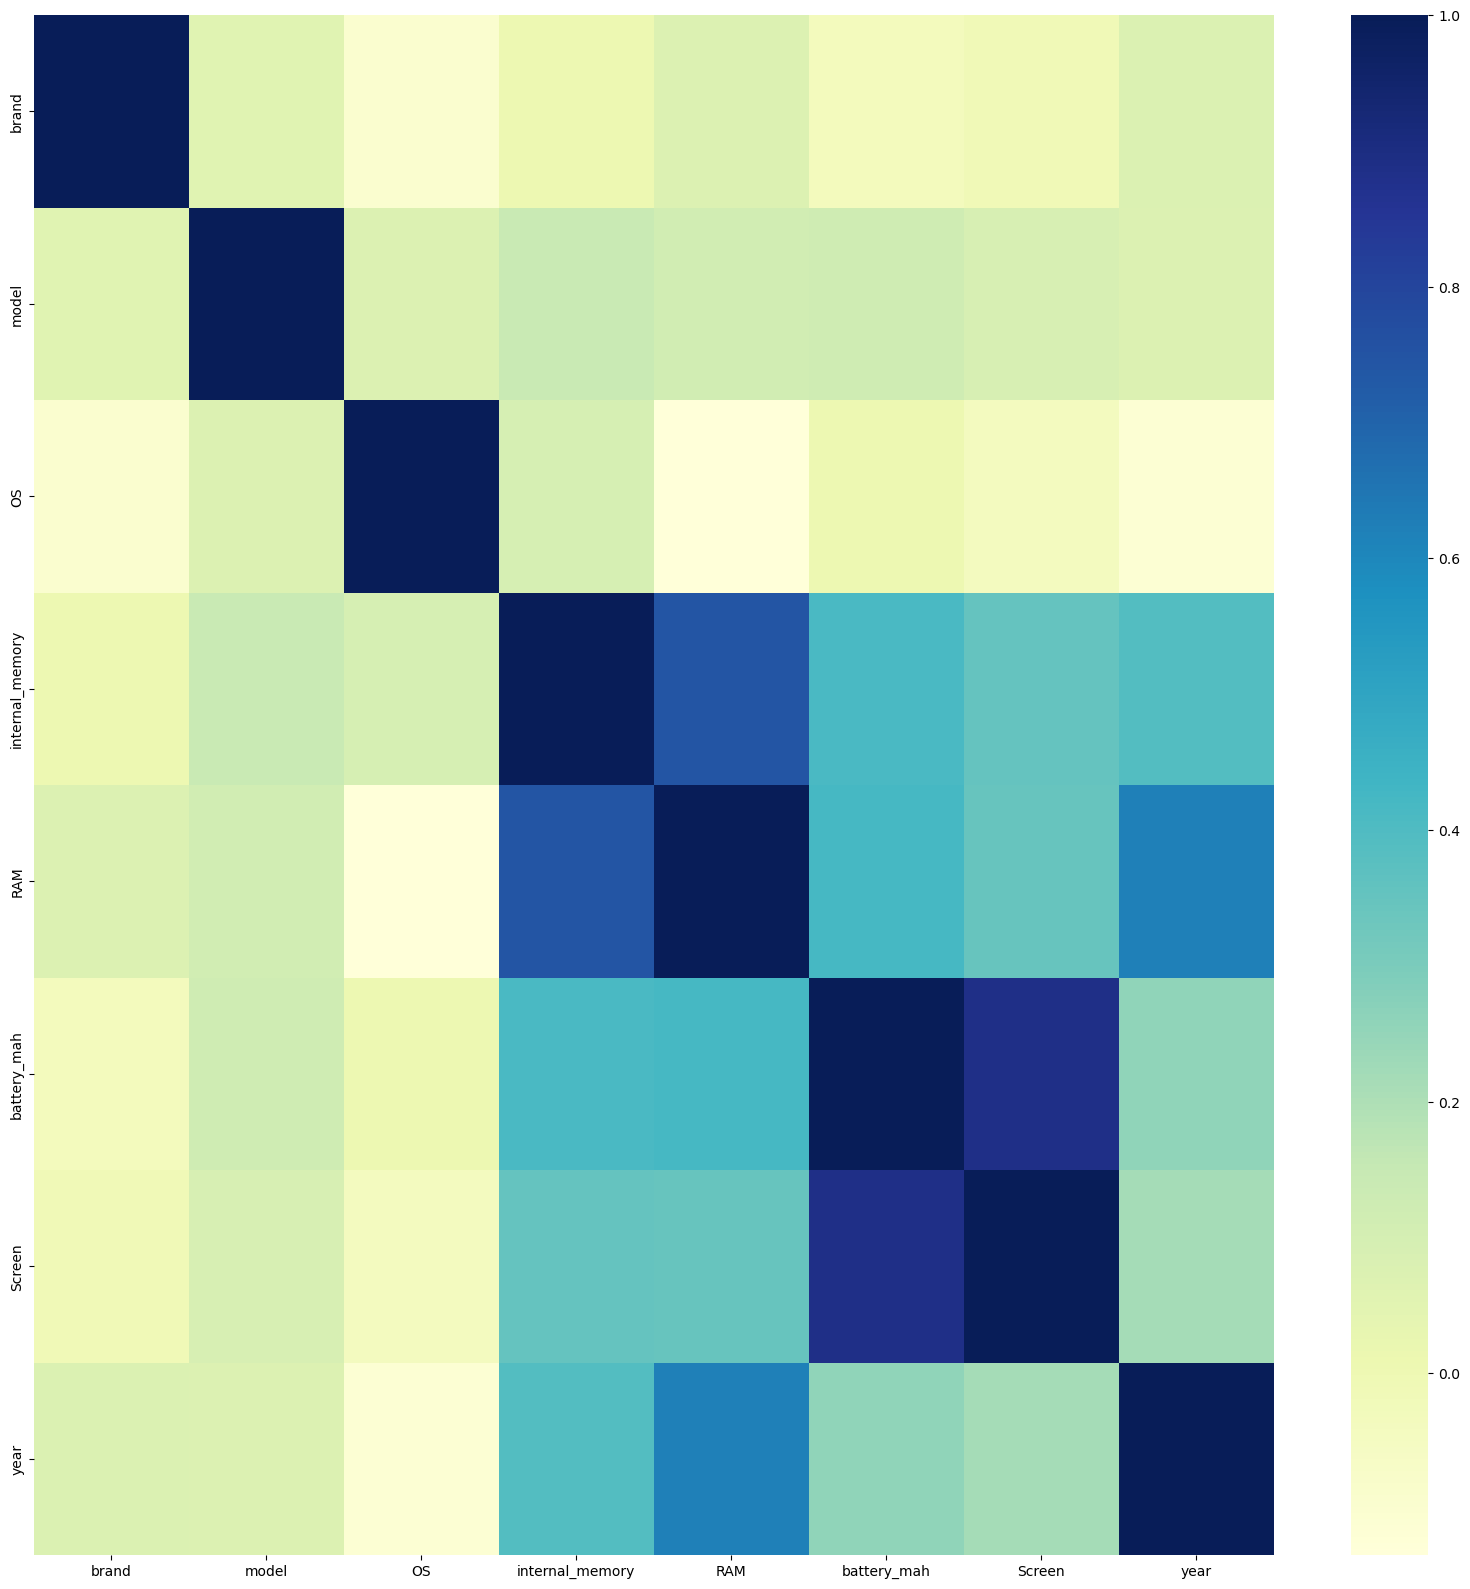

In [137]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(), cmap='YlGnBu')

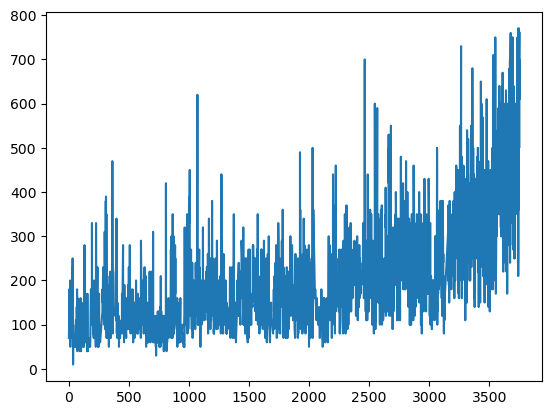

In [138]:
plt.plot(phone_data['Price'])

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Độ chính xác của mô hình: 0.5517579025354163


<Axes: >

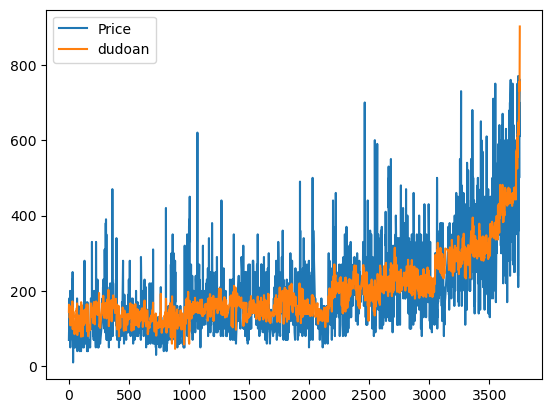

In [140]:
# Xây dựng mô hình Linear Regression
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán giá điện thoại trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình trên tập kiểm tra
score = model.score(X_test, y_test)
print('Độ chính xác của mô hình:', score)

filename = 'phone.sav'
pickle.dump(model, open(filename, 'wb'))

phone_data['dudoan']=model.predict(x)
phone_data[['Price','dudoan']].plot()


In [141]:
a=np.sqrt(pow(phone_data['dudoan']-phone_data['Price'],2).mean())
print(a)

80.53472811505421


<Axes: >

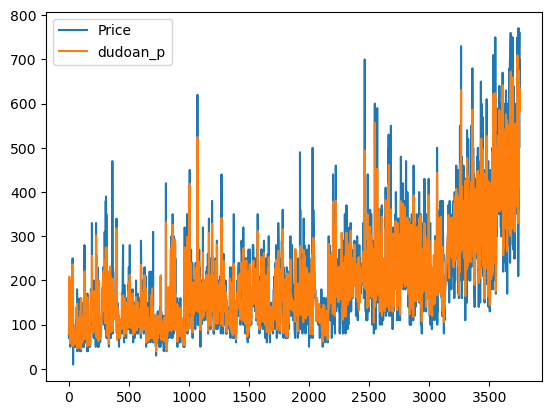

In [142]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
filename1 = 'phone_1.sav'
pickle.dump(rf, open(filename1, 'wb'))
phone_data['dudoan_p']=rf.predict(x)
phone_data[['Price','dudoan_p']].plot()

In [143]:
b=np.sqrt(pow(phone_data['dudoan_p']-data['Price'],2).mean())
print(b)

39.54144021357118
